In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

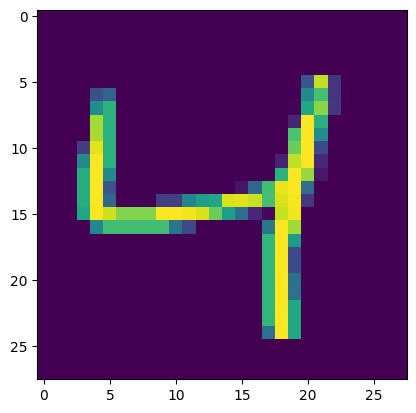

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 4ms/step - loss: 1.6400 - accuracy: 0.6176 - val_loss: 0.7758 - val_accuracy: 0.7845
Epoch 2/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6341 - accuracy: 0.8162 - val_loss: 0.5199 - val_accuracy: 0.8593
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4192 - accuracy: 0.8878 - val_loss: 0.3604 - val_accuracy: 0.9086
Epoch 4/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2861 - accuracy: 0.9286 - val_loss: 0.2690 - val_accuracy: 0.9374
Epoch 5/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2165 - accuracy: 0.9458 - val_loss: 0.2390 - val_accuracy: 0.9384
Epoch 6/25
1500/1500 [==============================] - 13s 8ms/step - loss: 0.1786 - accuracy: 0.9541 - val_loss: 0.2286 - val_accuracy: 0.9442
Epoch 7/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1519 - accuracy: 0.9620 - val_loss: 0.1864 - val_accur

In [15]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
y_pred = y_prob.argmax(axis=1)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9717

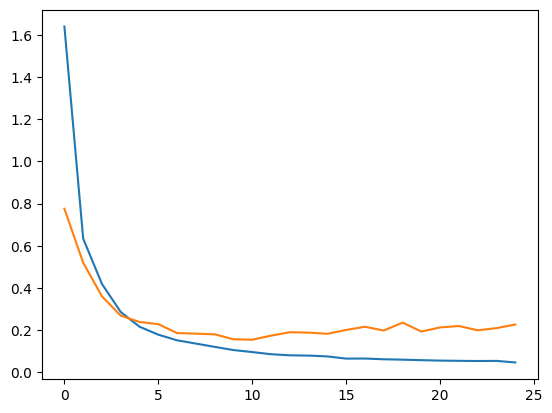

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

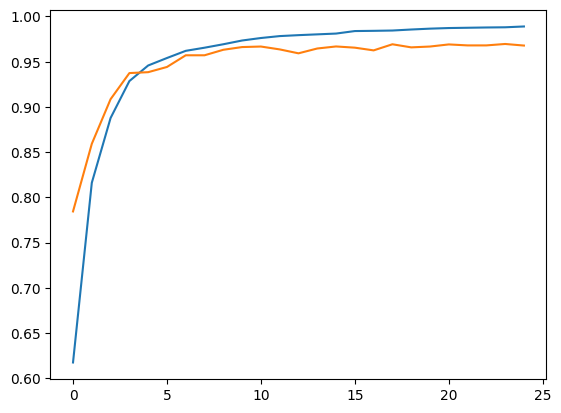

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

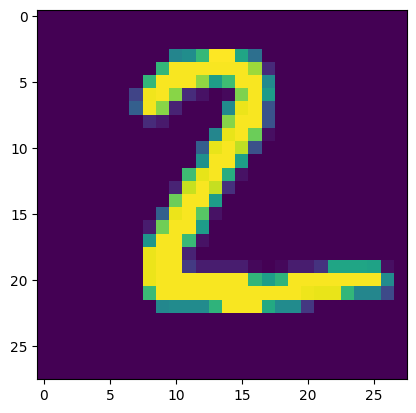

In [20]:
plt.imshow(X_test[1])

In [21]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 20ms/step


array([2])